# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** MOH SYAIFULLAH
- **Email:** mohammadsyaifullah80@mail.com
- **ID Dicoding:** moh_syaifullah

## Menentukan Pertanyaan Bisnis

- Bagaiamana tren penyewaan sepeda dari bulan ke bulan?
- Bagaimana performa penyewaan sepeda pada setiap musim?
- Siapa yang lebih sering menyewa, pengguna kasual atau pengguna terdaftar?
- Bagaimana tren nilai rfm penyewa sepeda dari bulan ke bulan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("C:/Users/TOSHIBA/submission/Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("C:/Users/TOSHIBA/submission/Bike-sharing-dataset/hour.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**  
- Proses gathering data ini merupakan tahapan awal untuk mengetahui data apa yang kita punya dan kolom apa saja yang kita butuhkan.   
- Jika dilihat dari kolom table day_df dan hour_df, Semua kolom mempunyai kesamaan kecuali kolom hr atau hari yang hanya ada pada table hour_df  xx


### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("jumlah duplikat: ", day_df.duplicated().sum())
day_df.describe()

jumlah duplikat:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
print("jumlah duplikat: ", hour_df.duplicated().sum())
hour_df.describe()

jumlah duplikat:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**  
- Pada tahapan ini, kita mencoba untuk meinilai apakah suatu data memiliki missing value, duplikat, kesalahan tipe data dan nilai yang aneh.
- Jika dilihat dari hasil penilaian, terdapat kesalahan tipe data pada kolom dteday atau tanggal disemua table data. Dimana pada kolom dteday tipe data berupa objek. seharusnya pada kolom dteday tipe datanya harus berupa datetime atu waktu adapun yang lainnya sudah tidak ditemukan adanya kesalahan.xx

### Cleaning Data

In [10]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [11]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**  
- proses ini untuk membersihkan atau memperbaiki kesalahan data yang sebelumnya sudah kita analisa. Dimana terdapat kesalahan tipe data pada kolom dteday atau tanggal.
- Seperti yang bisa kita lihat diatas bahwa kolom dteday sudah berubah yang awalnya berupa tipe data objek menjadi tipe data datetime.

## Exploratory Data Analysis (EDA)

### Explore table data day_df dan hour_df

In [12]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [13]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [14]:
all_df = pd.concat([day_df, hour_df])
all_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,NaN
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,NaN
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,NaN
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,NaN
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,NaN


In [15]:
all_df.groupby(by="mnth").cnt.sum()

mnth
1     269866
2     302704
3     457840
4     538188
5     663372
6     692684
7     689896
8     702388
9     691982
10    644704
11    509662
12    422072
Name: cnt, dtype: int64

In [17]:
all_df.groupby(by="season").cnt.sum()

season
1     942696
2    1837178
3    2122258
4    1683226
Name: cnt, dtype: int64

In [19]:
all_df.groupby("yr").agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
})

,casual,registered,cnt
yr,,,
0,494504,1991702,2486206
1,745530,3353622,4099152


**Insight:**
 Bulan agustus memiliki jumlah penyewa terbanyak sedangkan bulan januari memiliki jumlah penyewa rendah.x- Musim gugur merupakan musim dengan jumlah penyewa terbanyak sedangkan musim semi merupakan musim dengan jumlah penyewa terendah
- pengguna registered atau terdaftar memiliki jumlah terbanyak atau mendominasi daripada pengguna casualxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaiamana tren penyewaan sepeda dari bulan ke bulanan?

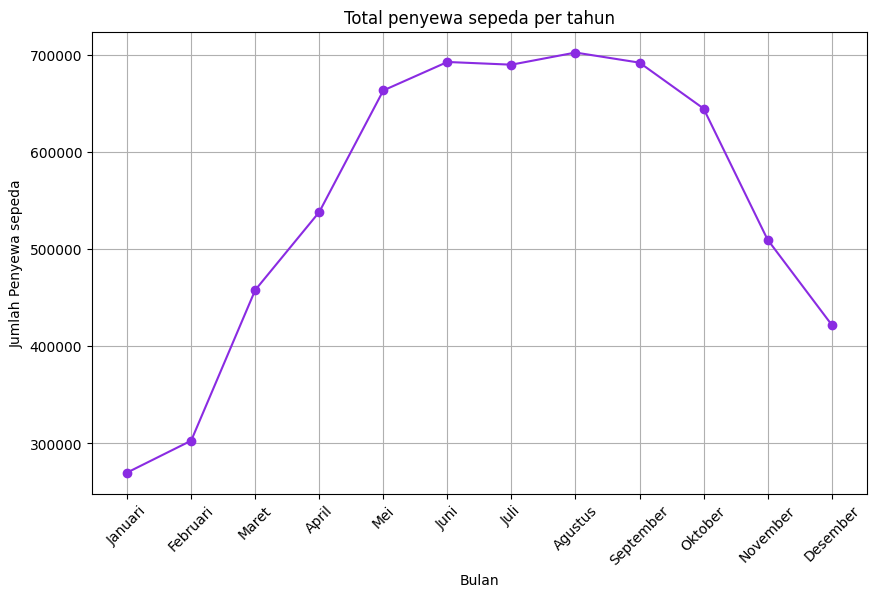

In [16]:
total_bike_rentals = all_df.groupby(by="mnth").cnt.sum().reset_index()

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(total_bike_rentals["mnth"], total_bike_rentals["cnt"], marker='o', color="blueviolet")
ax.set_xticks(total_bike_rentals["mnth"])
ax.set_xticklabels(['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
                 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'])
ax.set_title("Total penyewa sepeda per tahun")
ax.set_xlabel("Bulan")
ax.set_ylabel("Jumlah Penyewa sepeda")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Pertanyaan 2: Bagaimana performa penyewaan sepeda pada setiap musim?

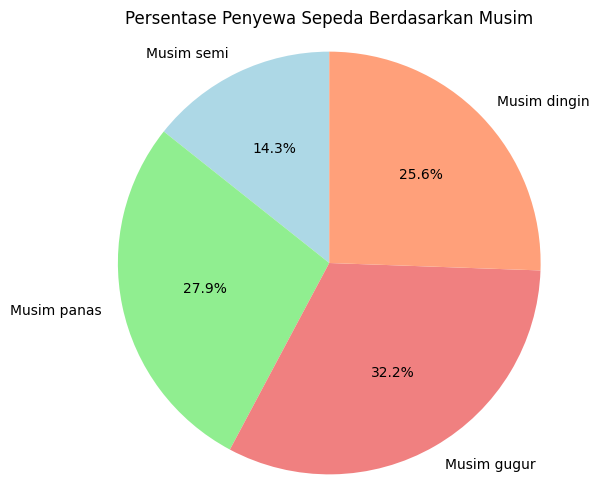

In [18]:
season_bike_rentals = all_df.groupby(by="season").cnt.sum().reset_index()

sizes = season_bike_rentals["cnt"]
labels = ['Musim semi', 'Musim panas', 'Musim gugur', 'Musim dingin']

# Membuat pie chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
ax.set_title("Persentase Penyewa Sepeda Berdasarkan Musim")
ax.axis('equal')

plt.show()

### Pertanyaan 3: Siapa yang lebih sering menyewa, pengguna kasual atau pengguna terdaftar?

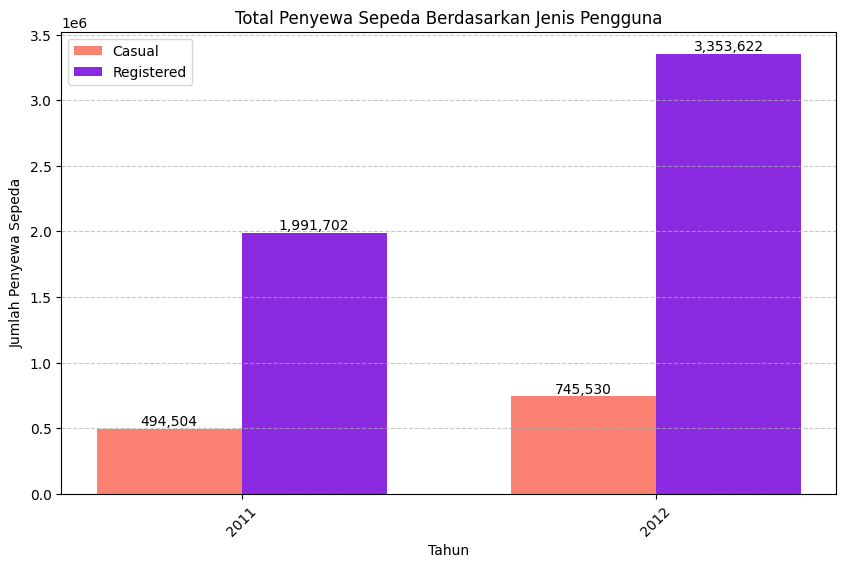

In [20]:
user_bike_rentals = all_df.groupby("yr").agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()

years = user_bike_rentals["yr"]
casual = user_bike_rentals["casual"]
registered = user_bike_rentals["registered"]

bar_width = 0.35
x = np.arange(len(years))

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - bar_width/2, casual, width=bar_width, label='Casual', color='salmon')
bars2 = ax.bar(x + bar_width/2, registered, width=bar_width, label='Registered', color='blueviolet')

ax.set_title("Total Penyewa Sepeda Berdasarkan Jenis Pengguna")
ax.set_xlabel("Tahun")
ax.set_ylabel("Jumlah Penyewa Sepeda")
ax.set_xticks(user_bike_rentals['yr'])
ax.set_xticklabels(['2011', '2012'])
ax.legend()

for bar in bars1:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, yval,
        f'{yval:,}',
        ha='center', va='bottom'
    )

for bar in bars2:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, yval,
        f'{yval:,}',
        ha='center', va='bottom'
    )

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Insight:**
- Pada pertanyaan pertama bisa kita simpulkan tren penyewaan berdasarkan bulan kita bisa melihat bahwa ada peningkatan yang signifikan pada bulan agustus hingga terjadi penurunan yang cukup besar di bulan oktober, november dan desember
- pada pertanyaan kedua bisa kita simpulkan performa penyewa sepeda didominasi pada musim gugur sedangkan di musim semi merupakan performa yang yang kecil.
- pada pertanyaan ketiga bisa kita simpulkan bahwa pengguna registered atau pengguana terdaftar lebih sering menyewa daripada pengguna casual. hal ini bisa disebabkan dari banyaknya pengguna yang memiliki aktivitas pekerjaxx

## Analisis Lanjutan (Opsional)

### Pertanyaan 4: Bagaimana tren nilai rfm penyewa sepeda dari bulan ke bulan?

In [21]:
import pandas as pd

# Pastikan kolom 'dteday' sudah dalam format datetime
all_df['dteday'] = pd.to_datetime(all_df['dteday'])

# Mengambil tanggal penyewaan terakhir
last_date = all_df['dteday'].max()

# 1. Menghitung Recency berdasarkan bulan
recency_df = all_df.groupby('mnth')['dteday'].max().reset_index()
recency_df['Recency'] = (last_date - recency_df['dteday']).dt.days
recency_df = recency_df[['mnth', 'Recency']]

# 2. Menghitung Frequency berdasarkan bulan
frequency_df = all_df.groupby('mnth')['cnt'].count().reset_index()
frequency_df.columns = ['mnth', 'Frequency']

# 3. Menghitung Monetary berdasarkan bulan
monetary_df = all_df.groupby('mnth')['cnt'].sum().reset_index()
monetary_df.columns = ['mnth', 'Monetary']

# Menggabungkan ketiga DataFrame
rfm_df = recency_df.merge(frequency_df, on='mnth')
rfm_df = rfm_df.merge(monetary_df, on='mnth')

# Menampilkan DataFrame RFM
print(rfm_df)

    mnth  Recency  Frequency  Monetary
0      1      335       1491    269866
1      2      306       1398    302704
2      3      275       1535    457840
3      4      245       1497    538188
4      5      214       1550    663372
5      6      184       1500    692684
6      7      153       1550    689896
7      8      122       1537    702388
8      9       92       1497    691982
9     10       61       1513    644704
10    11       31       1497    509662
11    12        0       1545    422072


C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_11168\1552345187.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mnth', y='Recency', data=rfm_df, palette='viridis')
C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_11168\1552345187.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mnth', y='Frequency', data=rfm_df, palette='magma')
C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_11168\1552345187.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mnth', y='Monetary', data=rfm_df, palette='cividis')


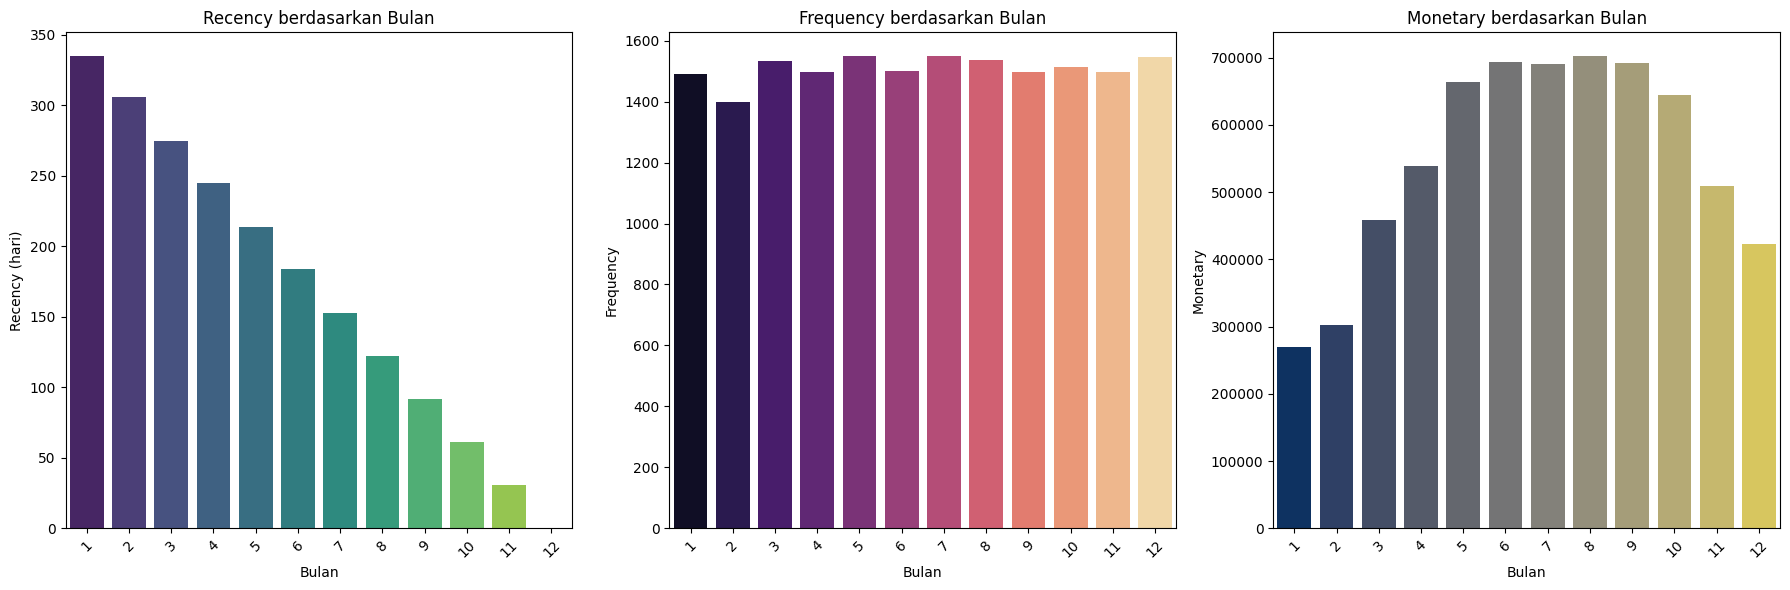

In [23]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.barplot(x='mnth', y='Recency', data=rfm_df, palette='viridis')
plt.title('Recency berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Recency (hari)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot(x='mnth', y='Frequency', data=rfm_df, palette='magma')
plt.title('Frequency berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Frequency')
plt.xticks(rotation=45)


plt.subplot(1, 3, 3)
sns.barplot(x='mnth', y='Monetary', data=rfm_df, palette='cividis')
plt.title('Monetary berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Monetary')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Conclusion

- Bahwa bulan agustus merupakan bulan dengan penyewa sepeda tertinggi. ini mungkin terjadi karena adanya hubungan berdasarkan musim
-Bahwa performa penyewa sepeda dimiliki pada musim gugur. seperti kesimpulan diatas kemungkinan besar adanya hubungan terkait performa dengan penyewa tertinggi berdasarkan bulan.
- Bahwa kebanyakan pengguna sepeda merupakan pengguna registered atau terdaftar. yang berarti besar kemungkinan jumlah penyewa sepeda banyak digunakan oleh kalangan pekerja
- Pada analisa lanjutan bisa kita simpulkan bahwa :
- Tren regency menunjjukkan bahwa penyewa sepeda lebih sering menyewa sepeda pada bulan awal kemudian regency cendrung menurun atau penyewa sepeda jarang menyewa setiap bulannya. ini mungkin terjadi karena perubahan minat atau perubahan kebiasaan pengguna.
- Tren frequency menunjjukan bahwa penyewa secara stabil melakukan penyewaan sepeda disetiap bulannya. mseskipun pada bulan 2 cendrung menurun tapi masih tergolong tinggi.
- Tren monetory menunjjukkan bahwa penyewa sepeda menghabiskan uang untuk menyewa diakhir bulan. dimana pada bulan 10 merupakan jumlah terbanyak menyewa sepeda. ini juga mungkin pengaruh dari faktor musim..2

In [27]:
all_df.to_csv("all_data.csv", index=False)